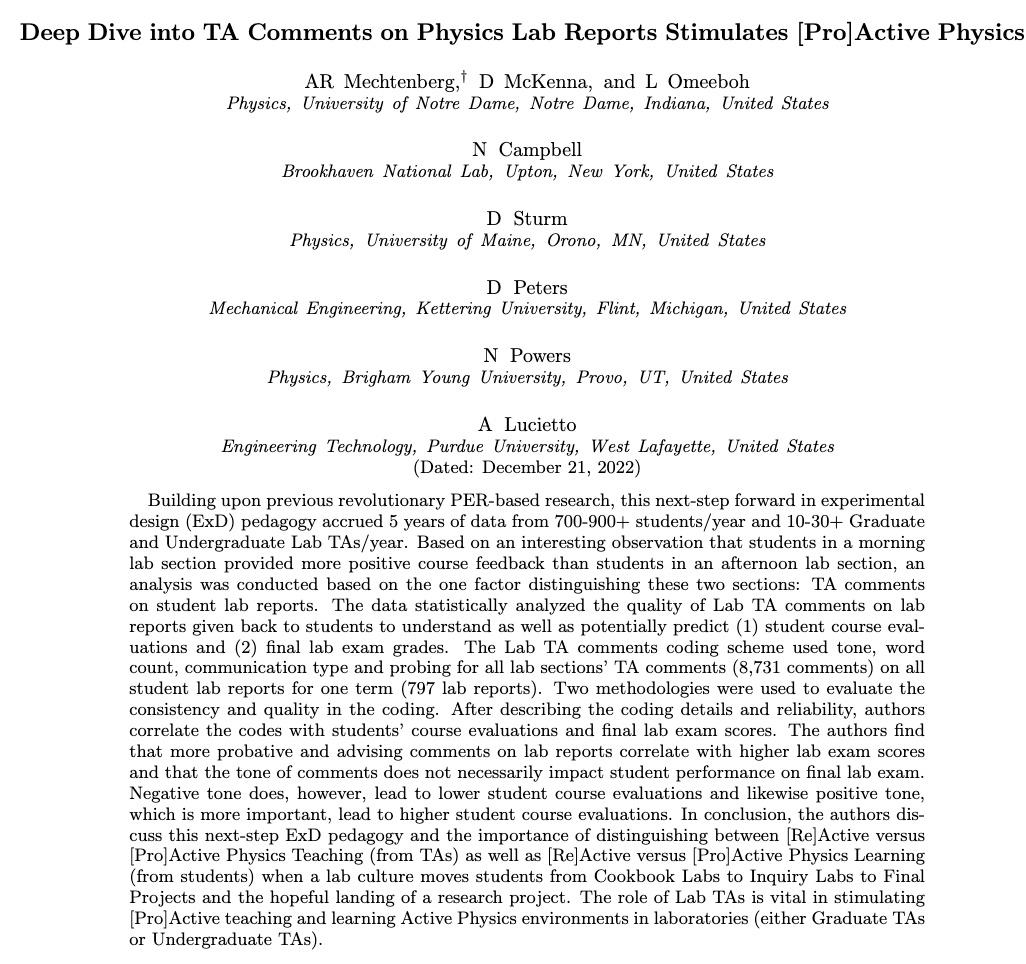

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 8), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 3.97 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [5]:
# Data for a single PreMed Lab term with 8,731 comments on 797 lab reports by Lab TAs.
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

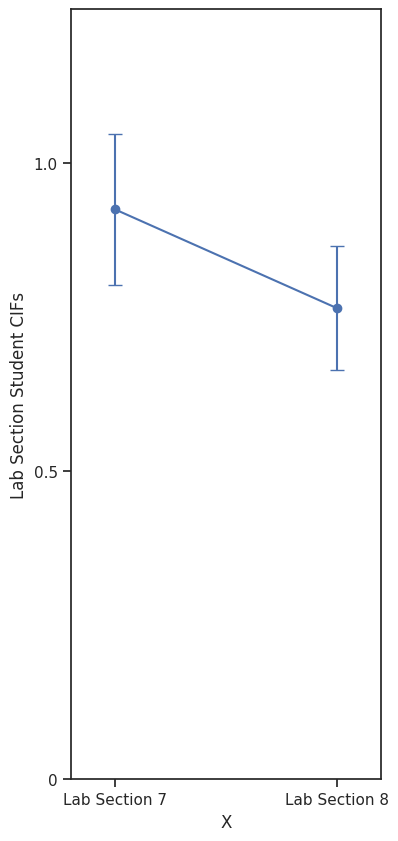

In [ ]:
import matplotlib.pyplot as plt

# Data points
x = [7, 8]
y = [0.925, 0.765]

# Error bars
yerr = [0.1225, 0.1000]

plt.figure(figsize=(4,10))


# Create the plot
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Lab Section Student CIFs')
plt.xlim(6.8, 8.2)
plt.xticks([7,8], ['Lab Section 7', 'Lab Section 8'])
plt.yticks([0,0.5,1], ['0', '0.5', '1.0'])
plt.ylim(0, 1.25)

# Show the plot
plt.show()

In [8]:
data_group_i_df = pd.read_excel(path_to_colab / 'Paper_1/data_initial_numbers.xlsx', header = 0,sheet_name = 'Sheet1')
data_group_i_np = data_group_i_df.to_numpy()

LN_TA_avg_1 = data_group_i_df.groupby(['Section']).agg('mean')
LN_TA_std_1 = data_group_i_df.groupby(['Section']).agg('std')
LN_TA_avg_1 = LN_TA_avg_1[['Tone','Word Count','Complexity','Probative']]
LN_TA_avg_1_np = LN_TA_avg_1.to_numpy()
LN_TA_std_1 = LN_TA_std_1[['Tone','Word Count','Complexity','Probative']]
LN_TA_std_1_np = LN_TA_std_1.to_numpy()

print(LN_TA_avg_1)
print(LN_TA_avg_1_np.shape)
print(LN_TA_avg_1_np[5,0])
print(LN_TA_avg_1_np[6,0])
print(LN_TA_std_1)
print(LN_TA_std_1_np.shape)
print(LN_TA_std_1_np[5,0])
print(LN_TA_std_1_np[6,0])

             Tone  Word Count  Complexity  Probative
Section                                             
1        1.786976   12.555188    3.125828   0.759382
2        1.707870   11.912037    3.018056   0.746759
3        1.706608   13.323348    3.302203   0.790308
4        1.546154   11.799145    3.217094   0.718803
5        1.882012    9.388781    2.847195   0.764023
7        1.842324   15.334025    3.415975   0.946058
8        1.783951    9.154321    2.739712   0.712963
(7, 4)
1.842323651452282
1.7839506172839505
             Tone  Word Count  Complexity  Probative
Section                                             
1        0.696196    9.924048    0.923738   0.427577
2        0.757445   10.525456    1.009518   0.434968
3        0.701033   10.104670    0.940629   0.407268
4        0.912796   11.236390    1.029446   0.449775
5        1.137625   10.206288    1.105771   0.425019
7        0.592470   11.858041    0.984930   0.226020
8        1.010057    9.279217    0.996982   0.452612
(7

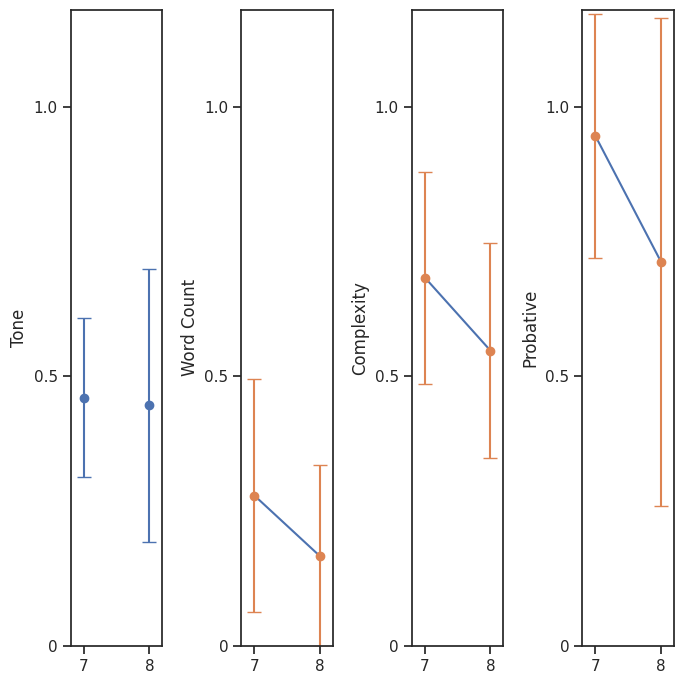

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = [7, 8]
y1 = [LN_TA_avg_1_np[5,0]/4,LN_TA_avg_1_np[6,0]/4]
y2 = [LN_TA_avg_1_np[5,1]/55,LN_TA_avg_1_np[6,1]/55]
y3 = [LN_TA_avg_1_np[5,2]/5,LN_TA_avg_1_np[6,2]/5]
y4 = [LN_TA_avg_1_np[5,3],LN_TA_avg_1_np[6,3]]

# Error bars
yerr1 = [LN_TA_std_1_np[5,0]/4,LN_TA_std_1_np[6,0]/4]
yerr2 = [LN_TA_std_1_np[5,1]/55,LN_TA_std_1_np[6,1]/55]
yerr3 = [LN_TA_std_1_np[5,2]/5,LN_TA_std_1_np[6,2]/5]
yerr4 = [LN_TA_std_1_np[5,3],LN_TA_std_1_np[6,3]]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 4, figsize=(7, 7))
#plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5)

# Plot each subplot
axs[0].errorbar(x, y1, yerr=yerr1, fmt='o', capsize=5)
axs[0].set_xlim(6.8, 8.2)
axs[0].set_ylim(0.0, 1.18)
axs[0].set_xticks([7,8], ['7', '8'])
axs[0].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[0].set_ylabel('Tone')

axs[1].plot(x, y2)
axs[1].errorbar(x, y2, yerr=yerr2, fmt='o', capsize=5)
axs[1].set_xlim(6.8, 8.2)
axs[1].set_ylim(0.0, 1.18)
axs[1].set_xticks([7,8], ['7', '8'])
axs[1].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[1].set_ylabel('Word Count')

axs[2].plot(x, y3)
axs[2].errorbar(x, y3, yerr=yerr3, fmt='o', capsize=5)
axs[2].set_xlim(6.8, 8.2)
axs[2].set_ylim(0.0, 1.18)
axs[2].set_xticks([7,8], ['7', '8'])
axs[2].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[2].set_ylabel('Complexity')

axs[3].plot(x, y4)
axs[3].errorbar(x, y4, yerr=yerr4, fmt='o', capsize=5)
axs[3].set_xlim(6.8, 8.2)
axs[3].set_ylim(0.0, 1.18)
axs[3].set_xticks([7,8], ['7', '8'])
axs[3].set_yticks([0,0.5,1], ['0', '0.5', '1.0'])
axs[3].set_ylabel('Probative')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

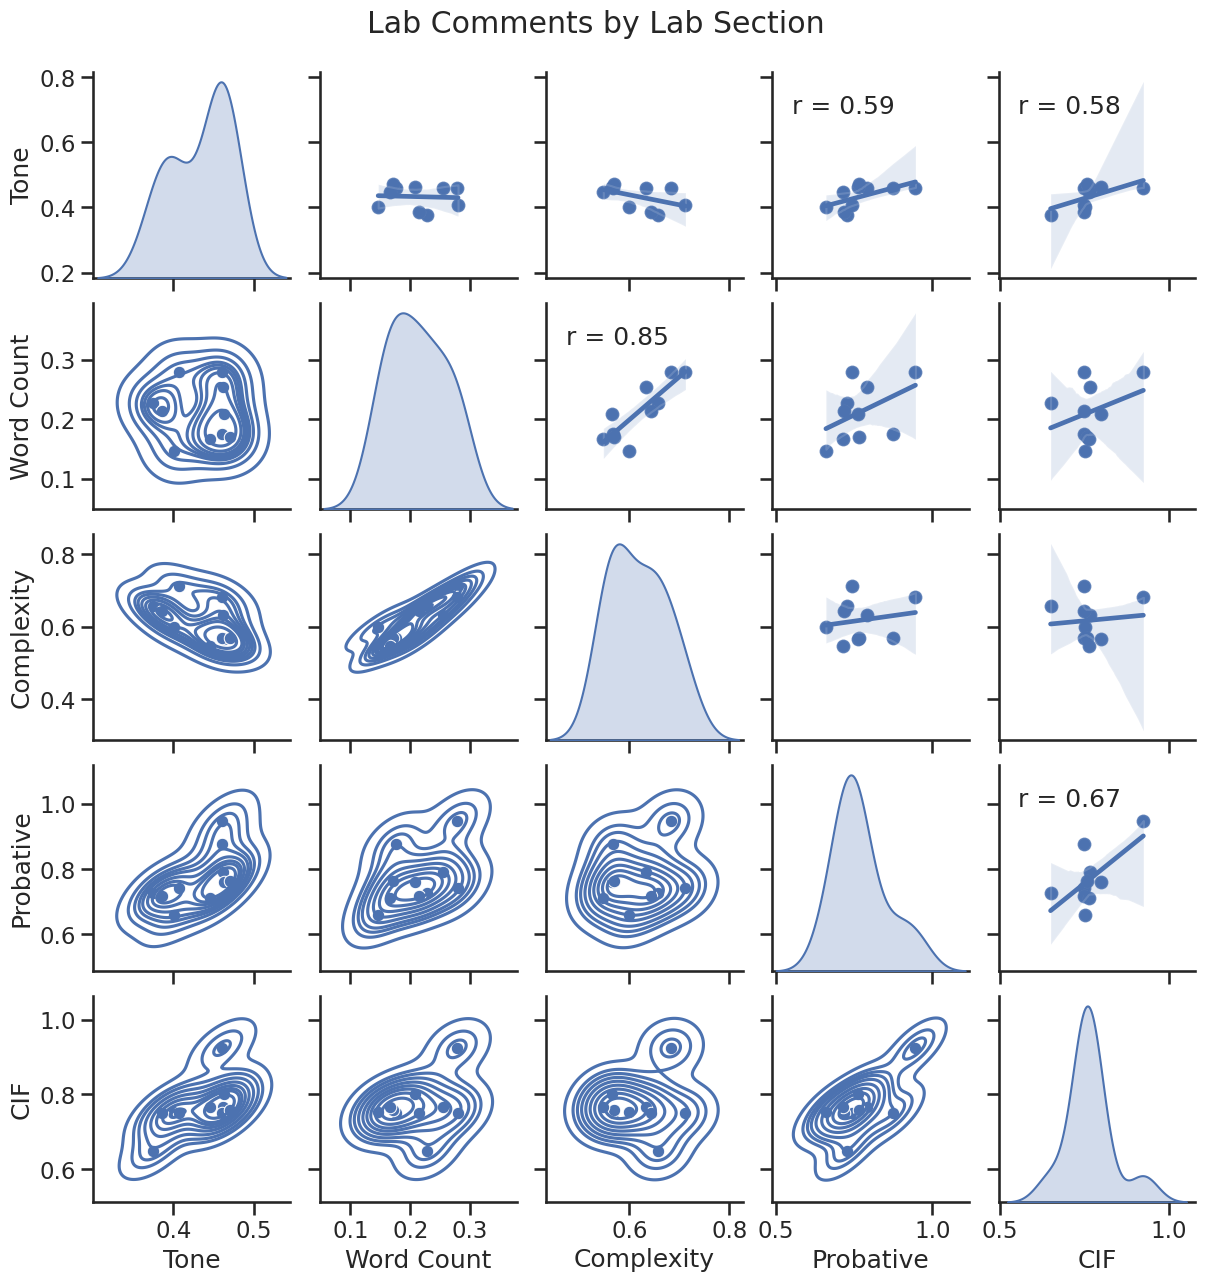

In [10]:
sns.set_context('talk')

data_cifs_sub = data_group2_df[['Tone','Word Count','Complexity','Probative','CIF']]

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    if p < 0.1:
      ax = plt.gca()
      ax.annotate("r = {:.2f}".format(r), xy=(0.1, .8), xycoords=ax.transAxes)
      # ax.annotate("p = {:.2f}".format(p), xy=(0.1, .7), xycoords=ax.transAxes)
    else:
      return()

g = sns.pairplot(data_cifs_sub[['Tone','Word Count','Complexity','Probative','CIF']], diag_kind="kde")
g.fig.suptitle('Lab Comments by Lab Section', y=1.03)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_upper(corrfunc)
#

plt.savefig('TA_Grp_Matrix.png')